
# Mini-project 2, DSC 170, Spring 2019
## Advanced Geopandas: spatial join and geoprocessing


In this mini-project, you will explore several common geospatial computations. The goal is to practice with different types of requests against a single layer, and then work on joining several data layers using real data. The goal is to demonstrate your geopandas mastery, and also to show that you can discover datasets and critically evaluate metadata. 

For each dataset that you found and used, explore its metadata and provide a brief description (about 3 sentences): indicate its title, URL, number of records, coordinate reference system, the manner in which it was compiled (as far as you can tell from the metadata), and any data quality considerations, especially those that may influence geometric processing. 

There will be one relatively simple warm-up problem, and one larger and very real problem that the City of San Diego is struggling with. The best creative solutions to the second one will be demonstrated when Scale-SD folks come here to give an invited talk.

Note that the upload file size limit has been removed from the datahub, so you should be able to upload your data.



In [1]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd

# add packages as needed

--------------------------------------------------------------------------------------
__Problem 1__. 

In an administrative boundaries map of California (find it as a GeoJSON or a shapefile on one of the web sites), find a county named San Diego and return its CRS, polygon coordinates, area (in sq miles), bounding box (in latitude and longitude), and a list of neighboring counties. 

Generally speaking, this will be a function to return geometric characteristics and neighbors of any polygon in an input dataframe (input_gdf) with a given name (poly_name) in a specific column (poly_name_field). Most lilely, in the database you find there will be a unique "San Diego" record - but it won't harm to do dissolve, just in case.

```python
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors
```



### Solution for problem 1: code and dataset description:

In [2]:
gdf = gpd.read_file('data/CA_Counties.shp')
gdf.head()

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP2007,POP00_SQMI,POP07_SQMI,...,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS97,AVG_SIZE97,CROP_ACR97,AVG_SALE97,SQMI,Dummy,geometry
0,1,Alameda,California,06,001,06001,1443741,1500793,1941.0,2017.7,...,16817,286277,237089,458,563,41553,91.50,743.8,no,"MULTIPOLYGON (((-122.31298 37.89733, -122.3118..."
1,2,Alpine,California,06,003,06003,1208,1262,1.6,1.7,...,1031,330,153,12,329,3127,25.59,743.6,no,"POLYGON ((-120.07260 38.44896, -120.07259 38.4..."
2,3,Amador,California,06,005,06005,35100,39657,58.0,65.6,...,2276,9629,3130,360,568,25486,58.71,604.7,no,"POLYGON ((-121.02765 38.50007, -121.02752 38.5..."
3,4,Butte,California,06,007,06007,203171,220904,121.1,131.7,...,5957,48336,31230,1942,208,247368,147.39,1677.5,no,"POLYGON ((-122.05727 39.85265, -122.05649 39.8..."
4,5,Calaveras,California,06,009,06009,40554,48342,39.1,46.6,...,6477,12967,3502,457,536,20835,21.54,1036.3,no,"POLYGON ((-120.99552 38.22545, -120.99498 38.2..."


In [3]:
# show that there's only one San Diego county in the dataset
gdf[gdf['NAME'] == "San Diego"] # this eliminates any reason to use dissolve

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP2007,POP00_SQMI,POP07_SQMI,...,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS97,AVG_SIZE97,CROP_ACR97,AVG_SALE97,SQMI,Dummy,geometry
36,37,San Diego,California,06,073,06073,2813833,3064142,663.8,722.9,...,45472,551461,443216,5925,80,112974,106.79,4238.8,no,"MULTIPOLYGON (((-117.50971 33.50502, -117.5036..."


__Problem 1 dataset description:__

This dataset is taken from the URL: https://hub.arcgis.com/datasets/statesales::ca-counties. This URL leads you to a dataset named CA Counties, which represents administrative boundaries of counties in California. There are 58 total records in this dataset because each row represents statistics and boundaries of one county in CA (for reference: CA has 58 counties). The CRS of the original dataset is EPSG:4326, which means that the geometry is shown in terms of latitude and longitude. According to the metadata, the data was compiled with multiple, third party data vendors. Vendors include: the Department of Commerce Census Bureau, the National Institute of Standards and Technology, U.S. Department of Agriculture (USDA), National Agricultural Statistics Service (NASS), and ESRI Internal Distributors. The only thing to note about this dataset is that the Census data is taken from 2000 (rather than the more up to date 2010) and the agricultural statistics are from 1997. This dataset isn't completely up to date, but it meets many of the requirements that we are looking to fit in this MP, including the fact that it contains the area of the county in square miles. This variable is defined by ESRI as "the area of the county in square miles using Albers Equal Area Projection." 

In [4]:
# YOUR CODE HERE
def poly_geometry(input_gdf, poly_name_field, poly_name):
    """Returns geometric characteristics and neighbors of any polygon in an 
    input dataframe with a given name in a specific column"""
    
    # find a county named San Diego
    input_gdf_SD = input_gdf[input_gdf[poly_name_field] == poly_name].reset_index(drop=True)
    
    # CRS 
    crs = input_gdf_SD.crs
    
    # polygon coordinates
    poly_coords = input_gdf_SD.geometry[0]
    
    # area
    area = input_gdf_SD.SQMI[0]
    
    # bounding box
    bounding_box = input_gdf_SD.bounds
    
    # neighbors
    neighbors = list(input_gdf[input_gdf.geometry.touches(input_gdf_SD.geometry[0])]['NAME'])

    return crs, poly_coords, area, bounding_box, neighbors

In [5]:
# running the function

input_gdf = gpd.read_file('data/CA_Counties.shp')
poly_name_field = 'NAME'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file

crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

# print(crs)
# print(poly_coords)
# print(area)
# print(bbox)
# print(neighbors)


__NOTE__: We searched up the area of SD County on Google and it says that SD County is 4,526 mi² (4,207 mi² Land / 319 mi² Water). We think that the reason our number is 4238.8 mi² is because of the different projections being used. It also probably doesn't help that our dataset may be a little more on the outdated side. However, these differences weren't too significant for us to find a new dataset.  

--------------------------------------------------------------------------------------

__Problem 2.__

Food choices in low and medium income (LMI) neighborhoods are limited, as these areas lack healthy food stores or other fresh food delivery mechanisms. There may be more fast food stores than fresh produce shops. Population is relatively poor, and filling the food basket with healthy options hasn't been an overwhelming priority for many households. Such areas are referred to as "food deserts". 

See these articles:
* https://www.sandiegouniontribune.com/news/data-watch/sdut-san-diego-food-deserts-2016may15-htmlstory.html (see food desert definitions here)
* https://www.npr.org/sections/thesalt/2013/03/13/174112591/how-to-find-a-food-desert-near-you
* https://www.geospatial.institute/wp-content/uploads/2018/03/Mapping-Food-Desserts-in-Southern-California-Counties.pdf 
* https://www.sandiegoreader.com/news/2018/sep/04/stringers-imperial-beach-food-desert/# (a recent one, about IB)
* https://www.kpbs.org/news/2018/mar/29/sdsu-students-take-food-deserts-national-city/
* http://newscenter.sdsu.edu/sdsu_newscenter/news_story.aspx?sid=74890 
* https://grist.org/food/americas-worst-food-deserts-map-lovers-edition/
* https://ucsdcommunityhealth.org/news/promoting-produce-consumption/

There was also a Master's thesis at UCSD: https://escholarship.org/uc/item/0s78j9g2

Don't read them all, just skim to understand the issues and get ideas.

We'll analyze the current state of food deserts, using lists of businesses that operate in San Diego, and social-demographic data from SanDAG (by census tracts). 

For the list of businesses, let's use City of San Diego tax certificates:
https://data.sandiego.gov/datasets/business-listings/. These data are current, and include lat/lon. They also include detailed NAICS codes for each business. This is the recommended dataset. We are interested in active certificates. We are also interested in types of businesses that are relevant to healthy (and unhealthy) food options. Healthy food options would include FOOD (HEALTH) SUPPLEMENT STORES, GROCERY STORES and GROCERY (EXCEPT CONVENIENCE) STORES. Unhealthy food options would include FOOD SERVICES & DRINKING PLACES, FULL-SERVICE RESTAURANTS, LIMITED-SERVICE EATING PLACES, LIMITED-SERVICE RESTAURANTS (a.k.a fast food places), BEER, WINE & LIQUOR STORES, TOBACCO STORES, CONVENIENCE STORES (a mixed bag...). We have provided this as part of the assignment. You don't need to download it, but you may if you wish.


There is also "SanDAG's point locations of business sites" in San Diego County (see metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=BUSINESS_SITES.pdf). This is already a shapefile, so this is a plus (but note  disclaimers in the metadata). The date is 8/17/2017, i.e. not as current. Industry codes are not as detailed as NAICS in the City's dataset. 

We'll also get relevant spatial data layers from SanDAG: Promise Zone, and census tract boundaries. Note that you'll need to create a free account to access Sandag GIS data warehouse.

Descriptions of promise zones can be found at these links:
* https://www.hud.gov/sites/documents/SAN-DIEGO_ZONE_3RD.PDF
* https://www.sandiego.gov/economic-development/sdpromisezone/maps
* https://www.sandiego.gov/economic-development/sdpromisezone

To download the shapefiles, visit the SanDAG's "Maps and GIS" section:
* Promise Zone is under Business. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=Promise_Zone_SD.pdf. Alternatively, you can use https://data.sandiego.gov/datasets/promise-zone/
* Census tracts are under Census. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Census&Name=CENSUS_TRACTS_2010.pdf. 

Social-demographic data by census tracts can be downloaded from SanDAG at https://sandag.org/index.asp?classid=26&fuseaction=home.classhome. You can try to find the data yourself - but  we also include an xlsx file with some income statistics by census tracts. 

San Diego County municipal boundaries (metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Jurisdiction&Name=Municipal_Boundaries.pdf) can be downloaded from the same GIS Data Warehouse, under the "Jurisdiction" section. Alternatively, use https://data.sandiego.gov/datasets/san-diego-boundary/ (we only need the boundary of San Diego city, so the latter is quite sufficient.)

Your tasks:

1. Download the data - promise zone, census tracts, jurisdictions (census tracts social-demographic data and businesses data are provided but you can download as well if you wish), read them into geopandas dataframes, and merge social-demographic data with tract boundaries as needed.

2. Subset the businesses (figure out, from NAICS descriptions, which businesses are likely to provide healthy food options, and which unhealthy. You can use our suggestions above but also feel free to deviate from them as long as you justify your choices.)

3. Determine census tracts intersecting with the promise zone, and all other census tracts within the boundary of San Diego.

4. For each census tract marked as belonging to the promise zone, and the other tracts within the city limits, calculate the number of healthy and not-healthy options within that tract. 

5. Compute the ratio of healthy and non-healthy options, and build a regression model showing how it depends on social-demographic characteristics, such as median income or number of people in lowest and highest income brackets. You may use sklearn on this dataframe by tracts to compute a linear regresson (as you did in DSC80. As a refresher, you may also check out https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9, https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606, https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn/29937049). Provide a brief description of regression results.

6. Generate a map showing the ratio of healthy and not healthy food options, and the locations of stores offering healthy food options. 

7. Extra Credit: Think of additional variables that you could bring into this analysis, and try to include them in the regression. ScaleSD is running a hackathon on this topic, and they have a good collection of data sources: https://www.scalesd.com/hackathon-2019/food-insecurity.html. 


We won't provide a skeleton for this problem. This is a much more open project than before. 


### Solution for problem 2: code, dataset descriptions, discussion of regression results:

__Problem 2 dataset descriptions:__

*URLS LOCATED ABOVE IN THE WRITE UP* 

__Promise Zone:__ This dataset gives the geometry for the Promise Zone in San Diego. The San Diego Promise Zone (SDPZ) is characterized by high unemployment, low educational attainment, insufficient access to healthy foods, concentrated poverty, rising crime,and the least affordable housing in the nation.

__Census Tracts:__ This dataset gives the geometries for each census tract in San Diego. 

__Social Demographic Data:__ This data contains the number of households at different income group levels for each census tract in San Diego.  

__Businesses List:__ This dataset is split up into two datasets that have active tax certificates created before and after 2008. I downloaded both datasets and combined the two for relevant businesses that still have active certificates. I chose not to download the inactive ones based on the assumption that those businesses aren't open anymore.  

__SD Municipal Boundaries:__ This data set shows the geometries of the municipal boundaries of San Diego. 

## Question 1

In [6]:
# read the data into GPD dataframes

list_of_businesses1 = pd.read_csv('data/sd_businesses_active_since08_datasd_v1.csv')
list_of_businesses2 = pd.read_csv('data/sd_businesses_active_pre08_datasd_v1.csv')
promise_zones = gpd.read_file('data/Promise_Zone_SD.shp')
census_tracts = gpd.read_file('data/CENSUS_TRACTS_2010.shp')
soc_dem_data = pd.read_excel('data/estimate_2019_tract_1603682892203.xlsx')
sd_municipal_boundaries = gpd.read_file('data/san_diego_boundary_datasd.shp')

# merge social demographic data w/ tract boundaries as needed
tract_w_demographics = pd.merge(census_tracts, soc_dem_data, on='TRACT', how='inner')
# filter out the data for the most recent year
tract_w_demographics = tract_w_demographics[tract_w_demographics['YEAR'] == max(tract_w_demographics['YEAR'])]

In [7]:
tract_w_demographics.head(10)

,TRACT,SHAPE_AREA,SHAPE_LEN,geometry,YEAR,ORDINAL,INCOME GROUP,HOUSEHOLDS
90,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,1,"Less than $15,000",157
91,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,2,"$15,000 to $29,999",269
92,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,3,"$30,000 to $44,999",168
93,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,4,"$45,000 to $59,999",226
94,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,5,"$60,000 to $74,999",178
95,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,6,"$75,000 to $99,999",256
96,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,7,"$100,000 to $124,999",196
97,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,8,"$125,000 to $149,999",151
98,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,9,"$150,000 to $199,999",174
99,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2019,10,"$200,000 or more",145


We filtered the data to depict data from 2019 because that's the most recent year available. We did this because we wanted accurate information without repeats for each year. Above you can see how many households were in a certain income group based on tract. Later in this MP, we'll pivot the table based on the "INCOME GROUP" column so that there's only one row per tract. 

## Question 2

In [8]:
# concat the two active business list datasets
list_of_businesses = pd.concat([list_of_businesses1, list_of_businesses2]).reset_index(drop=True)

# filter the list of businesses based on healthy categories given in the write up
businesses_healthy = list_of_businesses[(list_of_businesses['naics_description'] == 'FOOD (HEALTH) SUPPLEMENT STORES') | \
                                        (list_of_businesses['naics_description'] == 'GROCERY STORES') | \
                                        (list_of_businesses['naics_description'] == 'GROCERY (EXCEPT CONVENIENCE) STORES')]

# filter the list of businesses based on unhealthy categories given in the write up
businesses_unhealthy = list_of_businesses[(list_of_businesses['naics_description'] == 'FOOD SERVICES & DRINKING PLACES') | \
                                        (list_of_businesses['naics_description'] == 'FULL-SERVICE RESTAURANTS') | \
                                        (list_of_businesses['naics_description'] == 'LIMITED-SERVICE EATING PLACES') | \
                                        (list_of_businesses['naics_description'] == 'BEER, WINE & LIQUOR STORES') | \
                                        (list_of_businesses['naics_description'] == 'TOBACCO STORES') | \
                                        (list_of_businesses['naics_description'] == 'CONVENIENCE STORES')]

display(businesses_healthy.head())
display(businesses_unhealthy.head())

,account_key,account_status,date_account_creation,date_cert_expiration,business_owner_name,ownership_type,date_business_start,dba_name,naics_sector,naics_code,...,address_road,address_sfx,address_number_fraction,address_city,address_state,address_zip,suite,address_pmb_box,address_po_box,bid
180,2008000655,Active,2008-01-11,2021-02-28 00:00:00,EMMANUEL DANIEL,SOLE,2007-06-01 00:00:00,LEWS MARKET,44,4451,...,IMPERIAL,AVE,NaN,SAN DIEGO,CA,92102-4329,NaN,NaN,NaN,NaN
217,2008000994,Active,2008-01-18,2021-01-31 23:59:59,MARUKAI CORPORATION,CORP,2008-01-21 00:00:00,MARUKAI CORPORATION,44,4451,...,BALBOA,AVE,NaN,SAN DIEGO,CA,92111-2421,NaN,NaN,NaN,NaN
455,2008004747,Active,2008-02-25,2021-02-28 23:59:59,NORTHGATE GONZALEZ LLC,LLC,2008-03-01 00:00:00,NORTHGATE GONZALEZ MARKETS #26,44,44511,...,CORONADO,AVE,NaN,SAN DIEGO,CA,92154-2150,NaN,NaN,NaN,NaN
811,2008010873,Active,2008-04-15,2021-01-31 00:00:00,DALLO & CO INC,SCORP,2008-04-29 00:00:00,FOODLAND 5,44,44511,...,NATIONAL,AVE,NaN,SAN DIEGO,CA,92113-3114,NaN,NaN,NaN,NaN
888,2008013360,Active,2008-04-29,2021-10-31 00:00:00,B & A BROTHERS INC,CORP,2008-06-01 00:00:00,PARKSIDE MARKET,44,44511,...,THORN,ST,NaN,SAN DIEGO,CA,92104-4745,NaN,NaN,NaN,NaN


,account_key,account_status,date_account_creation,date_cert_expiration,business_owner_name,ownership_type,date_business_start,dba_name,naics_sector,naics_code,...,address_road,address_sfx,address_number_fraction,address_city,address_state,address_zip,suite,address_pmb_box,address_po_box,bid
27,2007010624,Active,2008-05-08,2021-04-30 23:59:59,LUVA DORO,SCORP,2005-01-01 00:00:00,LUVA DORO,72,722,...,INDIA,ST,NaN,SAN DIEGO,CA,92101-2515,NaN,NaN,NaN,Little Italy
41,2007011476,Active,2008-05-08,2021-05-31 00:00:00,RICHARD WALKER WEST INC,CORP,2006-06-01 00:00:00,RICHARD WALKER PANCAKE HOUSE`,72,72211,...,FRONT,ST,NaN,SAN DIEGO,CA,92101-6701,NaN,NaN,NaN,NaN
125,2008000093,Active,2008-01-02,2021-01-31 23:59:59,SAR CALIFORNIA HOLDCO INC,CORP,2008-02-01 00:00:00,SARKU JAPAN,72,72221,...,FRIARS,RD,NaN,SAN DIEGO,CA,92108-1159,935,NaN,NaN,NaN
232,2008001354,Active,2008-01-23,2021-01-31 23:59:59,TDLM INC,CORP,2006-01-13 00:00:00,NYALA TOBACCO EMPORIUM,45,453991,...,BALBOA,AVE,NaN,SAN DIEGO,CA,92111-2705,NaN,NaN,NaN,NaN
267,2008001958,Active,2008-01-28,2021-10-31 00:00:00,CDK BUSINESS ENTERPRISE INC,CORP,2007-07-06 00:00:00,CITY LIQUOR HOUSE,44,44531,...,05TH,AVE,NaN,SAN DIEGO,CA,92101-2712,NaN,NaN,NaN,NaN


## Question 3

In [9]:
# Determine census tracts intersecting with the promise zone
census_tract_pz = census_tracts[census_tracts.geometry.intersects(promise_zones.geometry[0]) == True]

# Determine all other census tracts within the boundary of San Diego that don't intersect the pz
census_tract_not_in_pz = census_tracts[census_tracts.geometry.intersects(promise_zones.geometry[0]) == False]

Text(0.5, 1.0, "Census Tracts That Don't Intersect w/ the PZ")

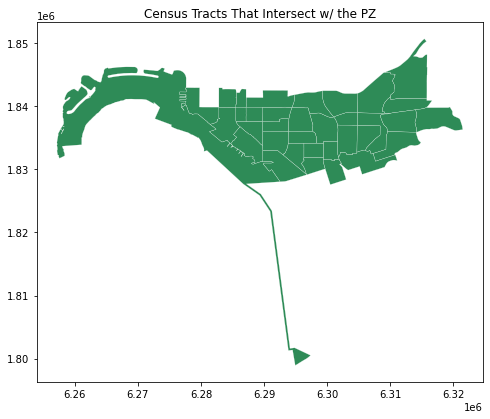

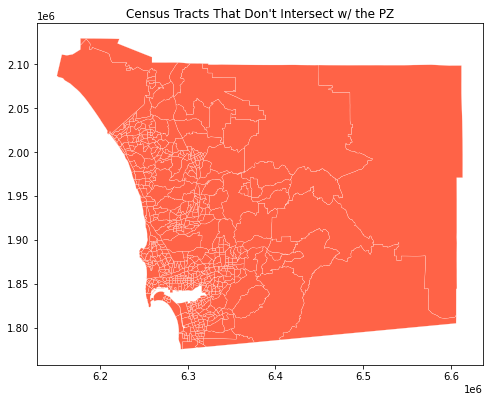

In [10]:
#Plots of the tracts in the promised zone and all other tracts outside of the promised zone
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(8,8))
census_tract_pz.plot(color='seagreen',linewidth=0.2, edgecolor='white', ax = ax)
ax.set_title("Census Tracts That Intersect w/ the PZ")

fig2, ax2 = plt.subplots(1, figsize=(8,8))
census_tract_not_in_pz.plot(color ='tomato',linewidth=0.2, edgecolor='white', ax = ax2)
ax2.set_title("Census Tracts That Don't Intersect w/ the PZ")

## Question 4

In [11]:
# helper function 
from shapely.geometry import Point
def make_point(point_lon,point_lat):
    """This function creates a WKT point based on long and lat arguments"""
    return Point(point_lon, point_lat)

# Create the geometry points
businesses_healthy = businesses_healthy.assign(**{'geometry' : businesses_healthy.apply(lambda x: make_point(x.lng, x.lat), axis=1)})
businesses_unhealthy = businesses_unhealthy.assign(**{'geometry' : businesses_unhealthy.apply(lambda x: make_point(x.lng, x.lat), axis=1)})

# initialize geodataframes 
healthy_gdf = gpd.GeoDataFrame(businesses_healthy)
healthy_gdf.crs = 'EPSG:4326'
unhealthy_gdf = gpd.GeoDataFrame(businesses_unhealthy)
unhealthy_gdf.crs = 'EPSG:4326'

# change all the datasets to the same projection so we can easily compare/plot the geometries
census_tract_pz = census_tract_pz.to_crs('EPSG:4326')
census_tract_not_in_pz = census_tract_not_in_pz.to_crs('EPSG:4326')
promise_zones = promise_zones.to_crs('EPSG:4326')

# businesses located within the pz and are unhealthy by CT
wi_pz_unhealthy = gpd.sjoin(unhealthy_gdf, census_tract_pz, how='inner', op='within').groupby('TRACT').count()[['account_key']]
wi_pz_unhealthy.rename(columns = {'account_key':'is_unhealthy'}, inplace = True) 

# businesses located within the pz and are healthy by CT
wi_pz_healthy = gpd.sjoin(healthy_gdf, census_tract_pz, how='inner', op='within').groupby('TRACT').count()[['account_key']]
wi_pz_healthy.rename(columns = {'account_key':'is_healthy'}, inplace = True) 

# businesses not located within the pz and are unhealthy by CT
nwi_pz_unhealthy = gpd.sjoin(unhealthy_gdf, census_tract_not_in_pz, how='inner', op='within').groupby('TRACT').count()[['account_key']]
nwi_pz_unhealthy.rename(columns = {'account_key':'is_unhealthy'}, inplace = True) 

# businesses not located within the pz and are healthy by CT
nwi_pz_healthy = gpd.sjoin(healthy_gdf, census_tract_not_in_pz, how='inner', op='within').groupby('TRACT').count()[['account_key']]
nwi_pz_healthy.rename(columns = {'account_key':'is_healthy'}, inplace = True) 

In [12]:
#Display the Unhealthy Businesses within and outside the promise zone tracts
print('Within Promise Zone')
display(wi_pz_unhealthy.head())

print('Outside Promise Zone')
display(nwi_pz_unhealthy.head())

Within Promise Zone


,is_unhealthy
TRACT,
30.03,1
31.03,2
31.11,2
31.12,2
33.01,2


Outside Promise Zone


,is_unhealthy
TRACT,
1.00,2
2.01,6
2.02,10
3.00,38
4.00,32


In [13]:
#Display the Healthy Businesses within and outside the promise zone tracts
print('Within Promise Zone')
display(wi_pz_healthy.head())

print('Outside Promise Zone')
display(nwi_pz_healthy.head())

Within Promise Zone


,is_healthy
TRACT,
30.01,1
31.03,2
31.11,2
31.12,1
33.01,1


Outside Promise Zone


,is_healthy
TRACT,
2.01,1
3.00,2
4.00,2
6.00,4
7.00,1


Below our tables, we includes sanity check graphs that show if we were getting the right number of healthy and unhealthy businesses based on location. The <span style="color:green"> green is the PZ </span> and the <span style="color:blue"> blue shows intersecting Census tracts </span>. The <span style="color:red"> red points indicate the different locations of the stores</span>. Our goal was to check whether or not those red points lied within the interecting tracts to check our spatial joins used in the code above. 

businesses located within the intersecting tracts and are unhealthy 


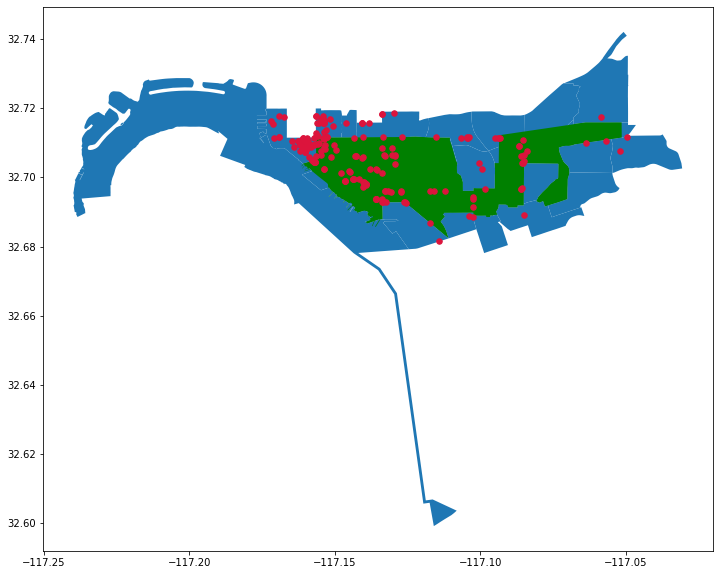

In [14]:
# businesses located within the pz and are unhealthy 
print("businesses located within the intersecting tracts and are unhealthy ")
point_gdf = gpd.sjoin(unhealthy_gdf, census_tract_pz, how='inner', op='within') # this sjoin can be seen in the code above
promise_zones_plot = census_tract_pz.plot(figsize=(15,10))
promise_zones.plot(ax=promise_zones_plot, color = 'green', figsize=(15,15))
point_gdf.plot(ax=promise_zones_plot, marker='o', color='crimson', markersize=30)

businesses located within the intersecting tracts and are healthy


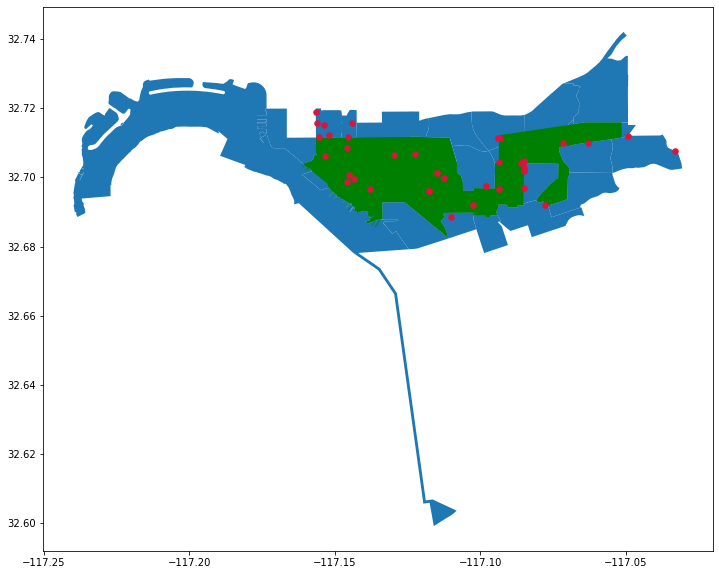

In [15]:
# businesses located within the pz and are healthy by CT
print("businesses located within the intersecting tracts and are healthy")
point_gdf = gpd.sjoin(healthy_gdf, census_tract_pz, how='inner', op='within')
promise_zones_plot = census_tract_pz.plot(figsize=(15,10))
promise_zones.plot(ax=promise_zones_plot, color = 'green', figsize=(15,15))
point_gdf.plot(ax=promise_zones_plot, marker='o', color='crimson', markersize=30)

businesses located outside of the intersecting tracts and are unhealthy


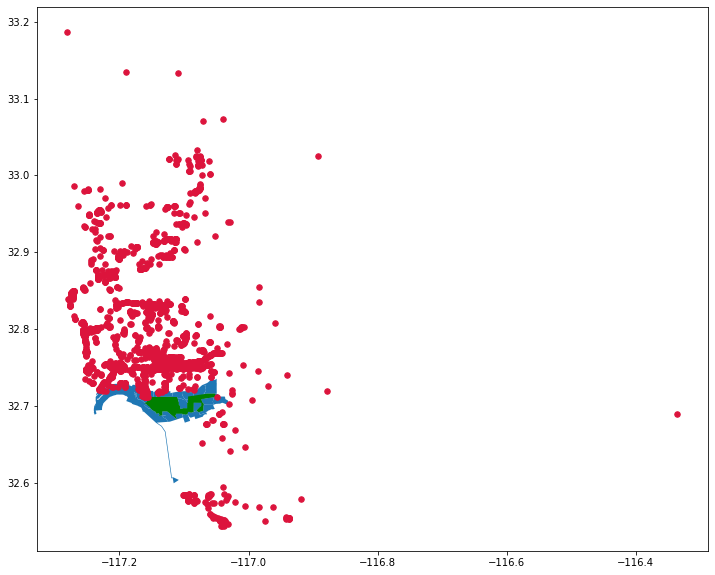

In [16]:
# businesses not located within the pz and are unhealthy
print("businesses located outside of the intersecting tracts and are unhealthy")
point_gdf = gpd.sjoin(unhealthy_gdf, census_tract_not_in_pz, how='inner', op='within')
promise_zones_plot = census_tract_pz.plot(figsize=(15,10))
promise_zones.plot(ax=promise_zones_plot, color = 'green', figsize=(15,15))
point_gdf.plot(ax=promise_zones_plot, marker='o', color='crimson', markersize=30)

businesses located outside of the intersecting tracts and are healthy


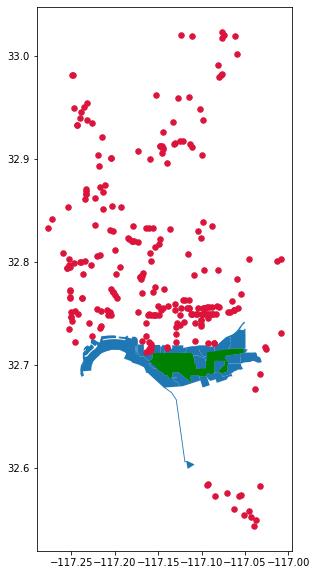

In [17]:
# businesses not located within the pz and are healthy 
print("businesses located outside of the intersecting tracts and are healthy")
point_gdf = gpd.sjoin(healthy_gdf, census_tract_not_in_pz, how='inner', op='within')
promise_zones_plot = census_tract_pz.plot(figsize=(15,10))
promise_zones.plot(ax=promise_zones_plot, color = 'green', figsize=(15,15))
point_gdf.plot(ax=promise_zones_plot, marker='o', color='crimson', markersize=30)

As you can see, there are very little healthy stores compared to unhealthy stores in both areas. We also wanted to see how many tracts included stores in the first place. The map below shows this. 

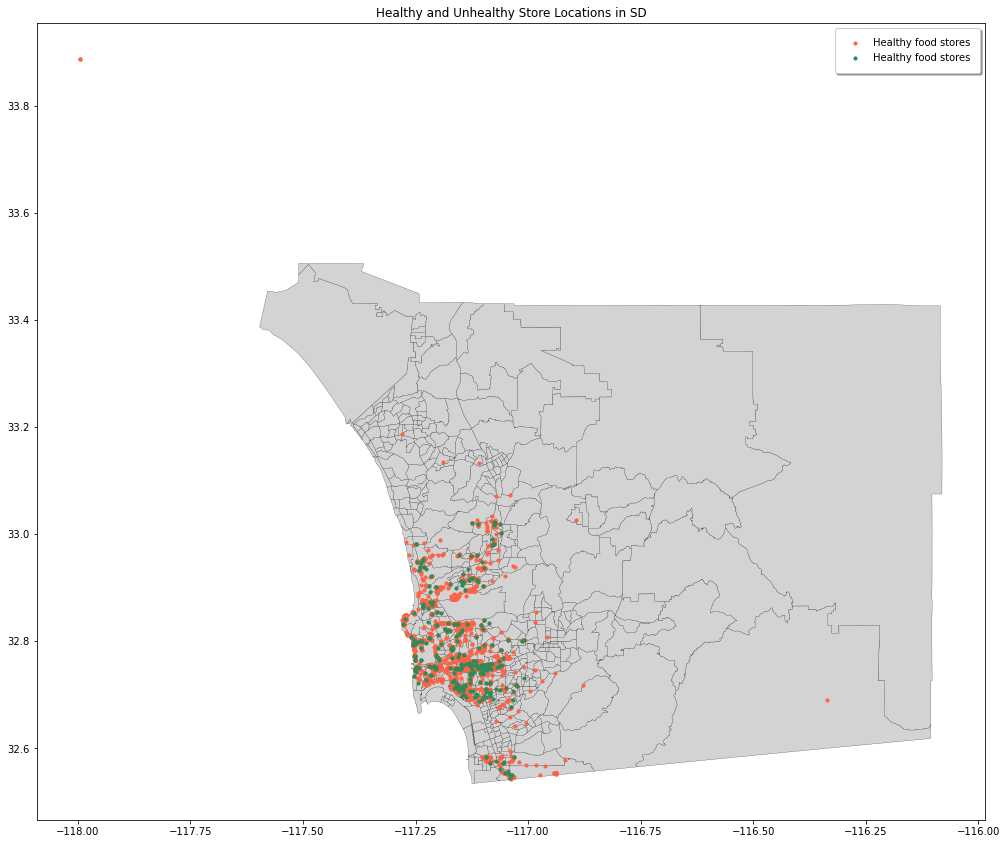

In [18]:
fig2, ax2 = plt.subplots(1, figsize=(17,17))
census_tracts.to_crs(4326).plot(color ='lightgrey',linewidth=0.2, edgecolor='black', ax = ax2)
ax2.set_title("Healthy and Unhealthy Store Locations in SD")
unhealthy_gdf.to_crs(4326).plot(ax=ax2, color='tomato', markersize = 10, label="Healthy food stores")
healthy_gdf.to_crs(4326).plot(ax=ax2, color='seagreen', markersize = 10, label="Healthy food stores")
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

It's clear that there are many tracts that don't contain healthy OR unhealthy stores (at least from the business list data set that we have), so we expect to see a lot of ratios that are 0. There also seems to be an outlier in the unhealthy store category where a store lies outside of SD census tracts. Since this store is filtered out during our sjoin, we didn't look too far into this issue. 

## Question 5

In this question, we decided to take the number of households in the lowest and highest income brackets and see if there was a correlation between those two variables and the ratio of healthy to unhealthy businesses. We computed ratios for each tract by dividing the number of healthy businesses by the number of unhealthy businesses. This means that a higher ratio number is defined by a higher number of healthy businesses.

* lowest income: < $15,000

* highest income: $200,000+

In [19]:
# compute the overall ratios within and outside of the pz
pz_ratio = sum(wi_pz_unhealthy['is_unhealthy'])/sum(wi_pz_healthy['is_healthy'])
not_pz_ratio = sum(nwi_pz_unhealthy['is_unhealthy'])/sum(nwi_pz_healthy['is_healthy'])
 
print("For every healthy food business, there are " + str(pz_ratio) + 
      " unhealthy food businesses located within SD's promise zone.")
print("\n" + "For every healthy food business, there are " + str(not_pz_ratio) +
      " unhealthy food businesses located outside of SD's promise zone.")

# build a regression model showing how the ratio depends on social-demographic characteristics
# such as median income or number of people in lowest and highest income brackets

from sklearn.linear_model import LinearRegression
import numpy as np

linreg = LinearRegression()

# merge the number of healthy and unhealthy businesses per tract into one dataset
in_pz = pd.merge(wi_pz_unhealthy, wi_pz_healthy, on="TRACT", how='inner').fillna(0).astype(int) # tracts in the pz
not_in_pz = pd.merge(nwi_pz_unhealthy, nwi_pz_healthy, on="TRACT", how='outer').fillna(0).astype(int) # tracts not in the pz
concat_together = pd.concat([in_pz, not_in_pz]) # combine these two together

# get a ratio for all available tracts that have businesses in them
concat_together['ratio'] = concat_together['is_healthy'] / concat_together['is_unhealthy']
concat_together = concat_together.replace([np.inf, -np.inf], np.nan).dropna(axis=0) # dropped the rows with inf values

# we dropped the rows with inf values because that means there are no business types to compare
# if a healthy business exists, but a non healthy one does not, then there is not point in taking a ratio
# later on we'll replace the dropped values with 0 just so each tract has a ratio associated with it

# this merge ensures that all tracts have a ratio (if there is none, then 0 is put as a placeholder)
# we replace NAN values with 0 because then we don't really care about the ratio 
# especially when we get to question 6, we only care about tracts with an actual ratio assigned to it
merged = pd.merge(concat_together, tract_w_demographics, on = "TRACT", how = 'outer').fillna(0) 

# filter out the lowest and highest incomes
lowest_highest_income = merged[(merged['ORDINAL'] == 1) | (merged['ORDINAL'] == max(merged['ORDINAL']))]

# pivot the table so that each row is only one tract (eliminates duplicates)
# an example of this final table is shown below
lowest_highest_income = lowest_highest_income.pivot(index='TRACT', columns='INCOME GROUP', values='HOUSEHOLDS').merge(concat_together, on = "TRACT", how = 'outer').fillna(0)

#X = input will be the income group and number of households in that income group
#y = what we are predicting is the amount of healthy/unhealthy in that tract
from sklearn.model_selection import train_test_split

X = lowest_highest_income[['$200,000 or more', 'Less than $15,000']]
y = lowest_highest_income['ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = linreg.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score
print("\nR^2: " + str(r2_score(y_test, preds)))
print("\nRMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, preds))))
print("\nCoefficients: " + str(model.coef_))


For every healthy food business, there are 6.054054054054054 unhealthy food businesses located within SD's promise zone.

For every healthy food business, there are 9.035433070866143 unhealthy food businesses located outside of SD's promise zone.

R^2: -0.014000827341274613

RMSE: 0.2565270594697949

Coefficients: [-2.93444837e-05  1.52873916e-04]


As seen with our low R^2 value, there is virtually no correlation between the number of houses in the highest/lowest income brackets and the ratio of healthy to non-healthy businesses. Although it may seem intuitive that areas with more lower income housing have less healthy stores, we may not be able to imply this because we need more data. For example, many of our tracts don't include healthy or non-healthy businesses in the first place so most of them would naturally get a ratio of zero. We also may be analyzing at too fine of a level with census tracts, so maybe we'd get something more patterned if we analyzed this data at the zip code level instead. 

Our coefficients indicate that as the number of households with incomes over 200,000 goes up, the ratio goes down very slightly. Whereas if the number of households with incomes below 15,000 goes up, the ratio goes up very slightly. Although this seems counterintuitive, we may be getting these result because of the data that we have. You can see the points plotted below showing that the ratio of healthy to non-healthy foods decreases as # of households with incomes 200,000 or more increase. Vice versa for # of households with income <15,000. This may be because we don't have enough data or because of the amount of areas with a ratio of zero are very high.  

Maybe there would have been a better statistic to compute than a ratio within tracts. Maybe we should have compared the number of healthy stores in one tract compared to all of the healthy businesses in SD. This might show that there are a less number of healthy businesses in areas with lower incomes. Maybe the ratio would be better at a zip code level as well since census tracts are a very small area of land. 

Text(0, 0.5, 'Ratio of Healthy to Non-Healthy Businesses')

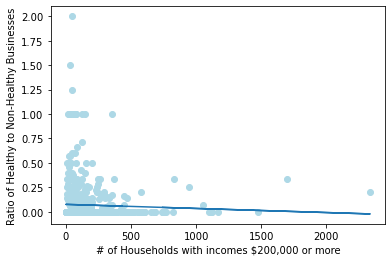

In [20]:
plt.scatter(lowest_highest_income['$200,000 or more'], lowest_highest_income['ratio'], color = "lightblue")
m, b = np.polyfit(lowest_highest_income['$200,000 or more'], lowest_highest_income['ratio'], 1)
plt.plot(lowest_highest_income['$200,000 or more'], m*lowest_highest_income['$200,000 or more'] + b)
plt.xlabel("# of Households with incomes $200,000 or more")
plt.ylabel("Ratio of Healthy to Non-Healthy Businesses")

Text(0, 0.5, 'Ratio of Healthy to Non-Healthy Businesses')

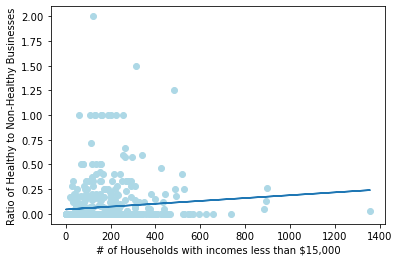

In [21]:
plt.scatter(lowest_highest_income['Less than $15,000'], lowest_highest_income['ratio'], color = "lightblue")
m, b = np.polyfit(lowest_highest_income['Less than $15,000'], lowest_highest_income['ratio'], 1)
plt.plot(lowest_highest_income['Less than $15,000'], m*lowest_highest_income['Less than $15,000'] + b)
plt.xlabel("# of Households with incomes less than $15,000")
plt.ylabel("Ratio of Healthy to Non-Healthy Businesses")

In [22]:
# here is an example of the table that our regression was run on
lowest_highest_income

,"$200,000 or more","Less than $15,000",is_unhealthy,is_healthy,ratio
TRACT,,,,,
1.00,433,54,2.0,0.0,0.000000
2.01,124,125,6.0,1.0,0.166667
2.02,185,202,10.0,0.0,0.000000
3.00,197,374,38.0,2.0,0.052632
4.00,158,78,32.0,2.0,0.062500
...,...,...,...,...,...
216.00,86,70,0.0,0.0,0.000000
218.00,195,48,0.0,0.0,0.000000
219.00,7,98,0.0,0.0,0.000000


## Question 6

Text(0.5, 1.0, 'Ratio of healthy to not healthy food options')

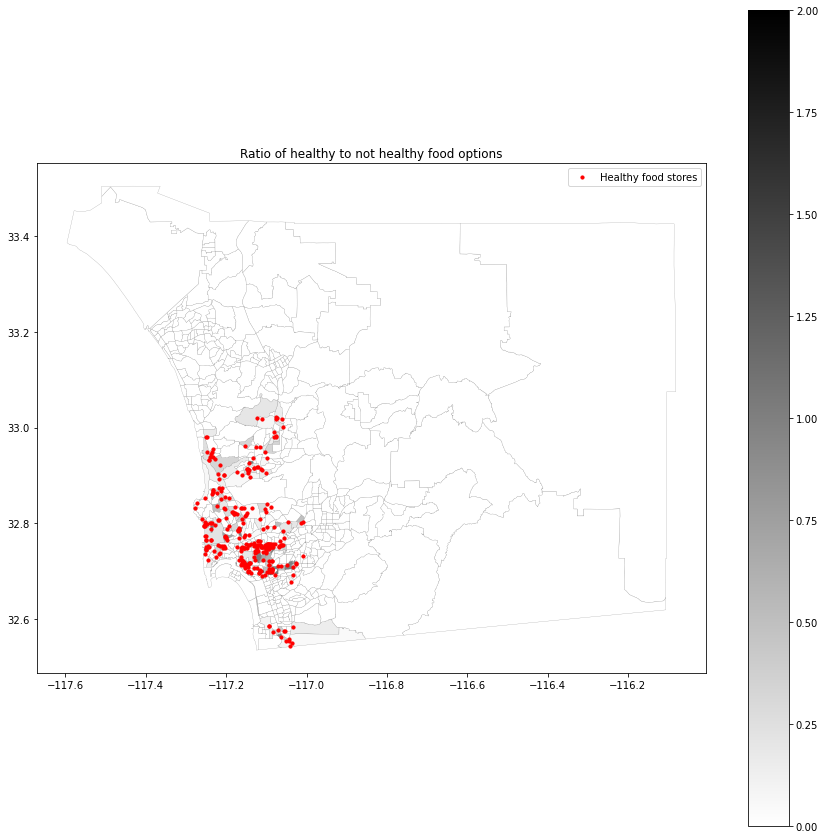

In [23]:
# original map with all of SD County
ratios = gpd.GeoDataFrame(lowest_highest_income.merge(census_tracts, on='TRACT')).to_crs(4326)
ratio_map = ratios.plot(column="ratio", cmap = "gray_r", linewidth=0.2, edgecolor='grey', figsize=(15,15), legend = True)
healthy_gdf.plot(ax=ratio_map, color='red', markersize = 10, label="Healthy food stores")
plt.legend()
plt.title("Ratio of healthy to not healthy food options")


We decided to clean the map by only showing relevant census tracts that actually contain healthy stores rather than showing the census tracts of all of San Diego.

Text(0.5, 1.0, 'Ratio of healthy to not healthy food options')

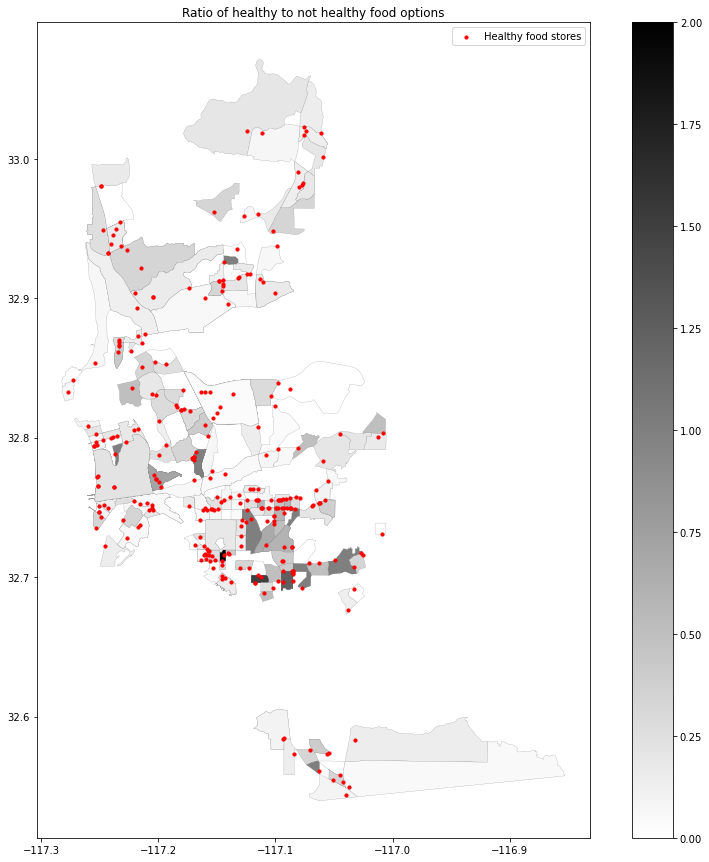

In [24]:
# clipped map w/ only relevant tracts showing 
#get the healthy business ratios
ratios = gpd.GeoDataFrame(lowest_highest_income.merge(census_tracts, on='TRACT')).to_crs(4326)

#Filter the rows in ratios df where it only includes the healthy businesses
intersect_healthy = gpd.sjoin(ratios, healthy_gdf, how='inner', op='intersects')

#Plot the tracts with the healthy businesses with their ratios
intersect_healthy_map = intersect_healthy.plot(column="ratio", cmap = "gray_r", linewidth=0.2, edgecolor='grey', figsize=(15,15), legend = True)
healthy_gdf.plot(ax=intersect_healthy_map, color='red', markersize = 10, label="Healthy food stores")

plt.legend()
plt.title("Ratio of healthy to not healthy food options")